In [ ]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib  as mp
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models,datasets

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = tf.pad(X_train,[[0,0],[2,2],[2,2]])/255
X_test = tf.pad(X_test,[[0,0],[2,2],[2,2]])/255

In [ ]:
X_train.shape

TensorShape([60000, 32, 32])

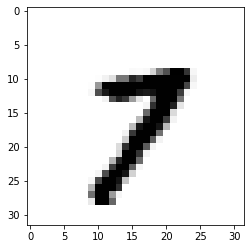

In [ ]:
plt.imshow(X_train[40000],cmap = mp.cm.binary)

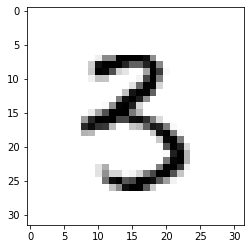

In [ ]:
X_test_check = X_test[5000]
plt.imshow(X_test_check,cmap = mp.cm.binary)

In [ ]:
X_train = tf.expand_dims(X_train,axis=3,name=None)
X_test = tf.expand_dims(X_test,axis=3,name=None)

In [ ]:
X_train.shape

TensorShape([60000, 32, 32, 1])

In [ ]:
X_val = X_train[-2000:,:,:,:]
y_val = y_train[-2000:]
X_train = X_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [ ]:
LeNet = models.Sequential()
LeNet.add(layers.Conv2D(6,5,activation='tanh',input_shape=X_train.shape[1:]))
LeNet.add(layers.MaxPool2D(2))
LeNet.add(layers.Activation('sigmoid'))
LeNet.add(layers.Conv2D(16,5,activation='tanh'))
LeNet.add(layers.MaxPool2D(2))
LeNet.add(layers.Activation('sigmoid'))
LeNet.add(layers.Conv2D(120,5,activation='tanh'))
LeNet.add(layers.Flatten())
LeNet.add(layers.Dense(84,activation='tanh'))
LeNet.add(layers.Dense(10,activation='softmax'))

In [ ]:
LeNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 activation_2 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 activation_3 (Activation)   (None, 5, 5, 16)         

In [ ]:
LeNet.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
LeNet.fit(X_train,y_train,batch_size=64,epochs=2,validation_data=(X_val,y_val))

Epoch 1/2
907/907 [==============================] - 37s 40ms/step - loss: 1.9975 - accuracy: 0.2457 - val_loss: 0.4173 - val_accuracy: 0.8825
Epoch 2/2
907/907 [==============================] - 36s 39ms/step - loss: 0.3511 - accuracy: 0.8901 - val_loss: 0.1805 - val_accuracy: 0.9460


In [ ]:
LeNet.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2718 - accuracy: 0.9141


[0.2718118727207184, 0.9140999913215637]

In [ ]:
pred=LeNet.predict(X_test)

In [ ]:
np.round(pred[5000],2)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)